In [2]:
import pandas as pd
import os
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('meteo_monthly_county_newvar.csv')
df.head()

,County,Year,Month,Consecutive Hot Days,Raining Days,Consecutive Ranning Days,Drying Days,Consecutive Drying Days,Rainfall,Hot Days,Wet Days,Consecutive Wet Days
0,Adams,1990,5,0,2,1,26,10,1.260,12,15,8
1,Adams,1990,6,4,5,3,23,10,2.830,15,13,8
2,Adams,1990,7,2,2,1,27,17,0.810,15,6,2
3,Adams,1990,8,3,1,1,29,24,0.990,25,8,4
4,Adams,1990,9,2,1,1,27,13,0.756,19,2,1


In [5]:
df[df['Month']==1]['Consecutive Hot Days'].unique()

array([0], dtype=int64)

In [2]:
df_meteo  = pd.read_csv('meteo_monthly_all_county_.csv')


In [3]:
df_meteo['Year'].max()

2023

In [4]:
df_meteo.columns

Index(['County', 'Station Name', 'Latitude', 'Longitude', 'Elevation', 'Year',
       'Month', 'Max Temp', 'Number Missing', 'Number Estimated', 'Min Temp',
       'Number Missing.1', 'Number Estimated.1', 'Avg Temp',
       'Number Missing.2', 'Number Estimated.2', 'Avg Bare Soil Temp',
       'Number Missing.3', 'Number Estimated.3', 'Avg Turf Soil Temp',
       'Number Missing.4', 'Number Estimated.4', 'Avg Wind Speed',
       'Number Missing.5', 'Number Estimated.5', 'Max Wind Speed',
       'Number Missing.6', 'Number Estimated.6', 'Total Solar Rad',
       'Number Missing.7', 'Number Estimated.7', 'Avg Penman PET',
       'Number Missing.8', 'Number Estimated.8', 'Total Penman PET',
       'Number Missing.9', 'Number Estimated.9', 'Total Rainfall',
       'Number Missing.10', 'Number Estimated.10', 'Avg Dew Point',
       'Number Missing.11', 'Number Estimated.11', 'Avg Wind Chill',
       'Number Missing.12', 'Number Estimated.12'],
      dtype='object')

In [6]:
df_meteo['Station Name'].unique()

array(['Amidon', 'Beach', 'Bismarck', 'Bottineau', 'Bowbells', 'Bowman',
       'Cando', 'Carrington', 'Carson', 'Cavalier', 'Cooperstown',
       'Crary', 'Crosby', 'Dazey', 'Denhoff', 'Dickinson', 'Dunn',
       'Edgeley', 'Fargo', 'Finley', 'Forest River', 'Fort Yates',
       'Genoa', 'Grand Forks', 'Harvey', 'Hazen', 'Hettinger',
       'Hillsboro', 'Jamestown', 'Karlsruhe', 'Langdon', 'Linton',
       'Lisbon', 'Mandan', 'Medicine Hole', 'Michigan', 'Minot', 'Mohall',
       'Mooreton', 'Mott', 'Oakes', 'Plaza', 'Robinson', 'Rolla', 'Rugby',
       'Stirum', 'Turtle Lake', 'Watford City', 'Williston', 'Wishek'],
      dtype=object)

In [7]:
df_meteo[['Station Name','County']].drop_duplicates()

,Station Name,County
0,Amidon,Slope
44,Beach,Golden Valley
401,Bismarck,Burleigh
461,Bottineau,Bottineau
825,Bowbells,Burke
1086,Bowman,Bowman
1450,Cando,Towner
1797,Carrington,Foster
2193,Carson,Grant
2271,Cavalier,Pembina


In [8]:
df_meteo = df_meteo[['County','Year','Month','Max Temp','Min Temp','Avg Temp','Avg Bare Soil Temp',
                     'Avg Turf Soil Temp','Avg Wind Speed','Max Wind Speed','Total Solar Rad',
                     'Total Penman PET', 'Avg Penman PET', 'Total Rainfall',
                     'Avg Dew Point','Avg Wind Chill']]

In [9]:
df_meteo.head()

,County,Year,Month,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,Total Penman PET,Avg Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,Slope,2019,9,70.377,45.771,58.074,60.908,59.874,7.731,25.025,308.761,4.442,0.148,5.346,48.947,56.721
1,Slope,2019,10,47.054,25.940,36.497,40.222,42.023,9.570,26.123,221.131,2.814,0.091,1.738,26.733,29.144
2,Slope,2019,11,38.102,18.333,28.217,33.080,33.933,7.834,23.313,139.173,1.329,0.044,NaN,23.065,21.766
3,Slope,2019,12,33.246,15.826,24.536,31.501,32.356,7.637,19.481,109.875,1.013,0.033,NaN,18.611,16.547
4,Slope,2020,1,29.239,10.557,19.898,26.477,27.885,8.639,25.982,124.369,1.110,0.036,NaN,13.703,10.174


In [10]:
# df_meteo = df_meteo.iloc[1:,:]
# df_meteo.head()

In [11]:
# for column in df_meteo.columns:
#     df_meteo[column] = df_meteo[column].astype('float')
df_meteo.dtypes

County                 object
Year                    int64
Month                   int64
Max Temp              float64
Min Temp              float64
Avg Temp              float64
Avg Bare Soil Temp    float64
Avg Turf Soil Temp    float64
Avg Wind Speed        float64
Max Wind Speed        float64
Total Solar Rad       float64
Total Penman PET      float64
Avg Penman PET        float64
Total Rainfall        float64
Avg Dew Point         float64
Avg Wind Chill        float64
dtype: object

In [12]:
df_meteo.isna().sum() #Nan exists in total rainfall and 0 exists too

County                   0
Year                     0
Month                    0
Max Temp                11
Min Temp                11
Avg Temp                11
Avg Bare Soil Temp      11
Avg Turf Soil Temp      11
Avg Wind Speed          11
Max Wind Speed          11
Total Solar Rad         11
Total Penman PET        11
Avg Penman PET          11
Total Rainfall        5730
Avg Dew Point           11
Avg Wind Chill          11
dtype: int64

In [13]:
# Affichez les lignes où la colonne "Min Temp" a une valeur nulle
df_min_temp_nan = df_meteo[df_meteo['Min Temp'].isna()]

# Affichez uniquement les 11 premières lignes (si vous voulez toutes les lignes, vous pouvez supprimer ".head(11)")
print(df_min_temp_nan.head(11))



      County  Year  Month  Max Temp  Min Temp  Avg Temp  Avg Bare Soil Temp  \
5562  Benson  2018      6       NaN       NaN       NaN                 NaN   
5563  Benson  2018      7       NaN       NaN       NaN                 NaN   
5564  Benson  2018      8       NaN       NaN       NaN                 NaN   
5565  Benson  2018      9       NaN       NaN       NaN                 NaN   
5566  Benson  2018     10       NaN       NaN       NaN                 NaN   
5567  Benson  2018     11       NaN       NaN       NaN                 NaN   
5568  Benson  2018     12       NaN       NaN       NaN                 NaN   
5569  Benson  2019      1       NaN       NaN       NaN                 NaN   
5570  Benson  2019      2       NaN       NaN       NaN                 NaN   
5571  Benson  2019      3       NaN       NaN       NaN                 NaN   
5572  Benson  2019      4       NaN       NaN       NaN                 NaN   

      Avg Turf Soil Temp  Avg Wind Speed  Max Wind 

In [14]:
# Triez le DataFrame par "County", "Year" et "Month" pour vous assurer que les valeurs suivantes sont disponibles
df_meteo = df_meteo.sort_values(by=['County', 'Year', 'Month'])

# Remplissez les valeurs manquantes pour Benson en utilisant les valeurs des années suivantes
df_meteo.loc[df_meteo['County'] == 'Benson', :] = df_meteo.loc[df_meteo['County'] == 'Benson', :].fillna(method='bfill')

# Affichez les lignes mises à jour pour les années 2018 à 2019
print(df_meteo[(df_meteo['County'] == 'Benson') & (df_meteo['Year'].isin([2018, 2019]))])


      County  Year  Month  Max Temp  Min Temp  Avg Temp  Avg Bare Soil Temp  \
5562  Benson  2018      6    66.093    40.606    53.350              57.732   
5563  Benson  2018      7    66.093    40.606    53.350              57.732   
5564  Benson  2018      8    66.093    40.606    53.350              57.732   
5565  Benson  2018      9    66.093    40.606    53.350              57.732   
5566  Benson  2018     10    66.093    40.606    53.350              57.732   
5567  Benson  2018     11    66.093    40.606    53.350              57.732   
5568  Benson  2018     12    66.093    40.606    53.350              57.732   
5569  Benson  2019      1    66.093    40.606    53.350              57.732   
5570  Benson  2019      2    66.093    40.606    53.350              57.732   
5571  Benson  2019      3    66.093    40.606    53.350              57.732   
5572  Benson  2019      4    66.093    40.606    53.350              57.732   
5573  Benson  2019      5    66.093    40.606    53.

C:\Users\Asus\AppData\Local\Temp\ipykernel_7388\4226070558.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_meteo.loc[df_meteo['County'] == 'Benson', :] = df_meteo.loc[df_meteo['County'] == 'Benson', :].fillna(method='bfill')


In [15]:
df_meteo.shape

(14023, 16)

In [21]:
L = list(df_meteo.columns)

elements_to_remove = ['Day', 'Year', 'Month']

L = [item for item in L if item not in elements_to_remove]

In [22]:
# Supposons que 'L_sum' représente les colonnes pour lesquelles vous voulez calculer la somme
columns_to_sum = ['Total Solar Rad', 'Total Penman PET', 'Total Rainfall']

# Supposons que 'L_mean' représente les colonnes pour lesquelles vous voulez calculer la moyenne
columns_to_mean = ['Max Temp', 'Min Temp', 'Avg Temp', 'Avg Bare Soil Temp',
                   'Avg Turf Soil Temp', 'Avg Wind Speed', 'Max Wind Speed',
                   'Avg Penman PET', 'Avg Dew Point', 'Avg Wind Chill']

# Group by 'County', 'Year', and 'Month' et calculer la somme pour certaines colonnes et la moyenne pour d'autres
df_meteo_agg = df_meteo.groupby(['County', 'Year', 'Month']).agg({
    **{col: 'sum' for col in columns_to_sum},
    **{col: 'mean' for col in columns_to_mean}
}).reset_index()

# Afficher le DataFrame agrégé
print(df_meteo_agg)


         County  Year  Month  Total Solar Rad  Total Penman PET  \
0         Adams  1990      5          521.759             6.859   
1         Adams  1990      6          611.813             9.168   
2         Adams  1990      7          616.828            10.448   
3         Adams  1990      8          509.065             9.412   
4         Adams  1990      9          416.151             7.947   
...         ...   ...    ...              ...               ...   
14018  Williams  2022     12           96.843             0.695   
14019  Williams  2023      1          115.293             0.406   
14020  Williams  2023      2          211.883             1.006   
14021  Williams  2023      3          339.345             1.198   
14022  Williams  2023      4          394.301             4.125   

       Total Rainfall  Max Temp  Min Temp  Avg Temp  Avg Bare Soil Temp  \
0               1.260    65.884    40.095    52.989              55.582   
1               2.830    79.369    50.848    

In [23]:
df_meteo_agg.size

224368

In [24]:
df_meteo_agg.head()

,County,Year,Month,Total Solar Rad,Total Penman PET,Total Rainfall,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Avg Penman PET,Avg Dew Point,Avg Wind Chill
0,Adams,1990,5,521.759,6.859,1.260,65.884,40.095,52.989,55.582,52.994,8.962,19.402,0.221,40.374,51.998
1,Adams,1990,6,611.813,9.168,2.830,79.369,50.848,65.109,68.710,65.190,9.173,23.472,0.306,51.932,65.414
2,Adams,1990,7,616.828,10.448,0.810,84.744,55.461,70.103,75.959,73.840,8.228,18.428,0.337,52.961,70.685
3,Adams,1990,8,509.065,9.412,0.990,87.200,56.277,71.738,75.420,74.002,7.275,18.813,0.304,52.165,71.631
4,Adams,1990,9,416.151,7.947,0.756,79.623,46.837,63.230,67.354,66.168,7.607,18.220,0.265,38.815,62.617


In [25]:
import pandas as pd

# Assuming your DataFrame is named df and contains the specified columns
# Adjust the columns as needed
columns_to_expand = ['County', 'Year', 'Max Temp', 'Min Temp', 'Avg Temp', 'Avg Bare Soil Temp', 'Avg Turf Soil Temp',
                     'Avg Wind Speed', 'Max Wind Speed', 'Total Solar Rad', 'Total Penman PET', 'Total Rainfall',
                     'Avg Penman PET', 'Avg Dew Point', 'Avg Wind Chill']

# Map numeric month values to month names
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Convert 'Month' column to month names
df_meteo_agg['Month'] = df_meteo_agg['Month'].map(month_mapping)

# Pivot the DataFrame
df_pivot = pd.pivot_table(df_meteo_agg,
                          index=['County', 'Year'],
                          columns=['Month'],
                          values=columns_to_expand,
                          aggfunc='first')

# Flatten the column MultiIndex and reset the index
df_pivot.columns = [f'{col} {month}' for col, month in df_pivot.columns]
df_pivot.reset_index(inplace=True)

# Display the pivoted DataFrame
print(df_pivot)


        County  Year  Avg Bare Soil Temp April  Avg Bare Soil Temp August  \
0        Adams  1990                       NaN                     75.420   
1        Adams  1991                    46.958                     76.742   
2        Adams  1992                    45.918                     68.793   
3        Adams  1993                    43.400                     70.448   
4        Adams  1994                    43.015                     71.961   
...        ...   ...                       ...                        ...   
1220  Williams  2019                    45.589                     71.402   
1221  Williams  2020                    44.482                     77.052   
1222  Williams  2021                    46.586                     70.300   
1223  Williams  2022                    36.877                     75.907   
1224  Williams  2023                    39.010                        NaN   

      Avg Bare Soil Temp December  Avg Bare Soil Temp February  \
0        

In [26]:
df_pivot.shape

(1225, 158)

In [27]:
df_pivot.isna().sum()

County                          0
Year                            0
Avg Bare Soil Temp April       43
Avg Bare Soil Temp August      60
Avg Bare Soil Temp December    50
                               ..
Total Solar Rad March          44
Total Solar Rad May            83
Total Solar Rad November       50
Total Solar Rad October        54
Total Solar Rad September      58
Length: 158, dtype: int64

In [28]:
import pandas as pd

def uppercase_county(df):
    df['County'] = df['County'].str.upper()
    return df

# Applying the function to df_pivot
df_pivot = uppercase_county(df_pivot)


In [29]:
df_pivot.groupby('County')['Year'].min().reset_index().head()

,County,Year
0,ADAMS,1990
1,BARNES,1993
2,BENSON,2018
3,BILLINGS,2019
4,BOTTINEAU,1993


## introduce ag data

In [30]:
df_ag = pd.read_csv('data_proc/ND_3types_County_from1990.csv')

In [31]:
df_ag.isna().sum()

Unnamed: 0                      0
Year                            0
Type                            0
County                          0
Ag District                     9
Ag District Code                0
ACRES HARVESTED                 7
ACRES PLANTED                   0
PRODUCTION, MEASURED IN BU      7
YIELD, MEASURED IN BU / ACRE    7
dtype: int64

In [32]:
df_ag = df_ag.drop(df_ag.columns[0], axis=1)
specified_columns = [
    'ACRES HARVESTED', 'ACRES PLANTED',
    'PRODUCTION, MEASURED IN BU', 'YIELD, MEASURED IN BU / ACRE']
df_ag['Calculated Yield'] = df_ag['PRODUCTION, MEASURED IN BU'] / df_ag['ACRES PLANTED']
df_ag = df_ag.drop(specified_columns,axis=1)
df_ag.head()

,Year,Type,County,Ag District,Ag District Code,Calculated Yield
0,2000,"WHEAT, SPRING, (EXCL DURUM)",ADAMS,SOUTHWEST,70,29.456693
1,2000,"WHEAT, SPRING, (EXCL DURUM)",BARNES,EAST CENTRAL,60,39.555556
2,2000,"WHEAT, SPRING, (EXCL DURUM)",BENSON,NORTH CENTRAL,20,29.539130
3,2000,"WHEAT, SPRING, (EXCL DURUM)",BILLINGS,SOUTHWEST,70,29.285714
4,2000,"WHEAT, SPRING, (EXCL DURUM)",BOTTINEAU,NORTH CENTRAL,20,31.834483


In [33]:
df_ag.isna().sum()

Year                0
Type                0
County              0
Ag District         9
Ag District Code    0
Calculated Yield    7
dtype: int64

In [34]:
df_ag

,Year,Type,County,Ag District,Ag District Code,Calculated Yield
0,2000,"WHEAT, SPRING, (EXCL DURUM)",ADAMS,SOUTHWEST,70,29.456693
1,2000,"WHEAT, SPRING, (EXCL DURUM)",BARNES,EAST CENTRAL,60,39.555556
2,2000,"WHEAT, SPRING, (EXCL DURUM)",BENSON,NORTH CENTRAL,20,29.539130
3,2000,"WHEAT, SPRING, (EXCL DURUM)",BILLINGS,SOUTHWEST,70,29.285714
4,2000,"WHEAT, SPRING, (EXCL DURUM)",BOTTINEAU,NORTH CENTRAL,20,31.834483
...,...,...,...,...,...,...
3851,1999,"WHEAT, WINTER",TOWNER,NORTHEAST,30,29.555556
3852,1999,"WHEAT, WINTER",TRAILL,EAST CENTRAL,60,42.909091
3853,1999,"WHEAT, WINTER",WARD,NORTHWEST,10,28.600000
3854,1999,"WHEAT, WINTER",WELLS,CENTRAL,50,27.857143


In [35]:
df_ag.Type.unique()

array(['WHEAT, SPRING, (EXCL DURUM)', 'WHEAT, SPRING, DURUM',
       'WHEAT, WINTER'], dtype=object)

In [36]:
df_ag.dtypes

Year                  int64
Type                 object
County               object
Ag District          object
Ag District Code      int64
Calculated Yield    float64
dtype: object

In [37]:
df_ag.isna().sum()

Year                0
Type                0
County              0
Ag District         9
Ag District Code    0
Calculated Yield    7
dtype: int64

In [38]:
df_ag.shape

(3856, 6)

In [39]:
df_ag['County'] = df_ag['County'].str.replace('LA MOURE','LAMOURE')

In [40]:
df_ag[df_ag['Type'] == 'WHEAT, SPRING, (EXCL DURUM)'].shape

(1637, 6)

In [41]:
df_ag[df_ag['Type'] == 'WHEAT, SPRING, (EXCL DURUM)']['County'].unique()

array(['ADAMS', 'BARNES', 'BENSON', 'BILLINGS', 'BOTTINEAU', 'BOWMAN',
       'BURKE', 'BURLEIGH', 'CASS', 'CAVALIER', 'DICKEY', 'DIVIDE',
       'DUNN', 'EDDY', 'EMMONS', 'FOSTER', 'GOLDEN VALLEY', 'GRAND FORKS',
       'GRANT', 'GRIGGS', 'HETTINGER', 'KIDDER', 'LAMOURE', 'LOGAN',
       'MCHENRY', 'MCINTOSH', 'MCKENZIE', 'MCLEAN', 'MERCER', 'MORTON',
       'MOUNTRAIL', 'NELSON', 'OLIVER', 'PEMBINA', 'PIERCE', 'RAMSEY',
       'RANSOM', 'RENVILLE', 'RICHLAND', 'ROLETTE', 'SARGENT', 'SHERIDAN',
       'SIOUX', 'SLOPE', 'STARK', 'STEELE', 'STUTSMAN', 'TOWNER',
       'TRAILL', 'WALSH', 'WARD', 'WELLS', 'WILLIAMS',
       'OTHER (COMBINED) COUNTIES', 'OTHER COUNTIES'], dtype=object)

In [42]:
df_pivot['County'].unique()

array(['ADAMS', 'BARNES', 'BENSON', 'BILLINGS', 'BOTTINEAU', 'BOWMAN',
       'BURKE', 'BURLEIGH', 'CASS', 'CAVALIER', 'DICKEY', 'DIVIDE',
       'DUNN', 'EMMONS', 'FOSTER', 'GOLDEN VALLEY', 'GRAND FORKS',
       'GRANT', 'GRIGGS', 'HETTINGER', 'KIDDER', 'LAMOURE', 'MCHENRY',
       'MCINTOSH', 'MCKENZIE', 'MCLEAN', 'MERCER', 'MORTON', 'MOUNTRAIL',
       'NELSON', 'PEMBINA', 'PIERCE', 'RAMSEY', 'RANSOM', 'RENVILLE',
       'RICHLAND', 'ROLETTE', 'SARGENT', 'SHERIDAN', 'SIOUX', 'SLOPE',
       'STARK', 'STEELE', 'STUTSMAN', 'TOWNER', 'TRAILL', 'WALSH', 'WARD',
       'WELLS', 'WILLIAMS'], dtype=object)

In [43]:
set_ag = set(df_ag[df_ag['Type'] == 'WHEAT, SPRING, (EXCL DURUM)']['County'].unique())
set_meteo = set(df_pivot['County'].unique())
set_ag-set_meteo

{'EDDY', 'LOGAN', 'OLIVER', 'OTHER (COMBINED) COUNTIES', 'OTHER COUNTIES'}

In [44]:
# Assuming df_ag and df_pivot are the DataFrames you want to merge
df_all = pd.merge(df_ag, df_pivot, on=['County', 'Year'], how='inner')


In [45]:
df_all.head()

,Year,Type,County,Ag District,Ag District Code,Calculated Yield,Avg Bare Soil Temp April,Avg Bare Soil Temp August,Avg Bare Soil Temp December,Avg Bare Soil Temp February,...,Total Solar Rad December,Total Solar Rad February,Total Solar Rad January,Total Solar Rad July,Total Solar Rad June,Total Solar Rad March,Total Solar Rad May,Total Solar Rad November,Total Solar Rad October,Total Solar Rad September
0,2000,"WHEAT, SPRING, (EXCL DURUM)",ADAMS,SOUTHWEST,70,29.456693,46.845,73.752,31.710,27.342,...,131.218,255.180,162.093,587.745,618.084,373.497,543.202,147.631,253.259,418.751
1,2000,"WHEAT, SPRING, DURUM",ADAMS,SOUTHWEST,70,30.937500,46.845,73.752,31.710,27.342,...,131.218,255.180,162.093,587.745,618.084,373.497,543.202,147.631,253.259,418.751
2,2000,"WHEAT, WINTER",ADAMS,SOUTHWEST,70,35.636364,46.845,73.752,31.710,27.342,...,131.218,255.180,162.093,587.745,618.084,373.497,543.202,147.631,253.259,418.751
3,2000,"WHEAT, SPRING, (EXCL DURUM)",BARNES,EAST CENTRAL,60,39.555556,37.646,70.361,29.173,29.100,...,101.999,189.332,113.329,510.045,518.709,304.525,432.396,117.758,202.139,331.623
4,2000,"WHEAT, SPRING, DURUM",BARNES,EAST CENTRAL,60,31.538462,37.646,70.361,29.173,29.100,...,101.999,189.332,113.329,510.045,518.709,304.525,432.396,117.758,202.139,331.623


In [46]:
df_all.shape

(2249, 162)

In [47]:
df_all['Calculated Yield'].isna().sum()

3

In [48]:
df_all[['Year','Calculated Yield']].dtypes

Year                  int64
Calculated Yield    float64
dtype: object

In [49]:
df_all['County'].unique()

array(['ADAMS', 'BARNES', 'BOTTINEAU', 'BOWMAN', 'CASS', 'CAVALIER',
       'DICKEY', 'EMMONS', 'FOSTER', 'GOLDEN VALLEY', 'GRAND FORKS',
       'KIDDER', 'LAMOURE', 'MCKENZIE', 'MCLEAN', 'MERCER', 'MORTON',
       'PEMBINA', 'RAMSEY', 'RENVILLE', 'RICHLAND', 'ROLETTE', 'STARK',
       'STUTSMAN', 'TOWNER', 'TRAILL', 'WALSH', 'WARD', 'WELLS',
       'WILLIAMS', 'BURKE', 'MCHENRY', 'MCINTOSH', 'DIVIDE', 'HETTINGER',
       'MOUNTRAIL', 'NELSON', 'PIERCE', 'RANSOM', 'DUNN', 'GRIGGS',
       'STEELE', 'GRANT', 'BENSON', 'BILLINGS', 'SLOPE', 'SHERIDAN',
       'SARGENT', 'BURLEIGH'], dtype=object)

## Choose the wheat type:

In [50]:
##Try removing Other Counties..
df_all = df_all[(df_all['County'] != 'OTHER (COMBINED) COUNTIES') & (df_all['County'] != 'OTHER COUNTIES')]
##

dict_type = dict({1: 'WHEAT, SPRING, (EXCL DURUM)' , 2: 'WHEAT, SPRING, DURUM', 3:'WHEAT, WINTER'})
select_type = 1



df_selected = df_all[df_all['Type'] == dict_type[select_type]]
if select_type == 1:
    df_selected = df_selected.dropna(subset=['Calculated Yield'])

### 'WHEAT, SPRING, (EXCL DURUM)'
### 'WHEAT, SPRING, DURUM'
###   'WHEAT, WINTER'

#### interpolation

In [112]:
df_interpolation = df_selected[df_selected['County']=='ADAMS']
df_interpolation['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2015, 2020, 2021, 2022, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999], dtype=int64)

<Axes: >

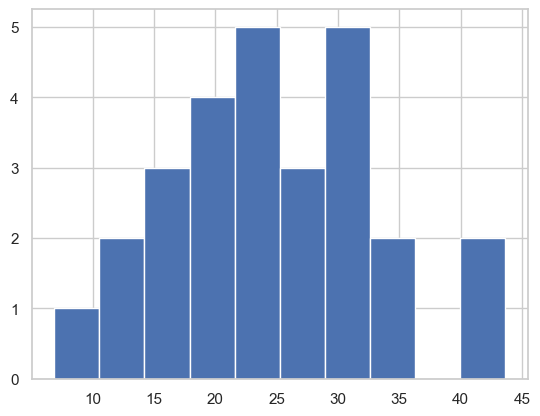

In [113]:
df_interpolation['Calculated Yield'].hist()

#### _

In [61]:
numeric_df = df_selected.select_dtypes(include='number')
numeric_df

,Year,Ag District Code,Calculated Yield,Avg Bare Soil Temp April,Avg Bare Soil Temp August,Avg Bare Soil Temp December,Avg Bare Soil Temp February,Avg Bare Soil Temp January,Avg Bare Soil Temp July,Avg Bare Soil Temp June,...,Total Solar Rad December,Total Solar Rad February,Total Solar Rad January,Total Solar Rad July,Total Solar Rad June,Total Solar Rad March,Total Solar Rad May,Total Solar Rad November,Total Solar Rad October,Total Solar Rad September
0,2000,70,29.456693,46.845,73.752,31.710,27.342,25.090,71.141,63.824,...,131.218,255.180,162.093,587.745,618.084,373.497,543.202,147.631,253.259,418.751
3,2000,60,39.555556,37.646,70.361,29.173,29.100,27.833,66.869,59.887,...,101.999,189.332,113.329,510.045,518.709,304.525,432.396,117.758,202.139,331.623
6,2000,20,31.834483,42.141,68.175,32.772,30.553,29.690,72.989,61.757,...,101.222,218.990,119.536,569.502,524.723,326.978,498.939,127.144,224.648,319.543
9,2000,70,24.924051,45.873,72.278,29.855,29.342,28.305,71.862,63.630,...,116.697,244.175,152.569,548.264,556.367,329.930,502.096,153.533,229.416,381.252
12,2000,60,41.424615,42.739,73.854,24.027,25.789,18.820,74.731,64.985,...,121.193,205.798,134.306,519.841,507.008,305.400,464.720,118.257,190.754,338.927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1999,60,34.967742,44.070,69.855,25.946,25.703,18.339,72.962,67.323,...,86.254,212.533,129.751,531.507,519.570,346.811,414.263,138.690,203.387,290.948
2238,1999,30,37.837209,40.448,67.819,31.035,29.332,25.897,71.602,65.451,...,96.748,210.640,138.381,553.426,534.865,356.852,435.702,132.363,207.952,287.040
2240,1999,10,21.398551,42.537,68.936,30.303,29.180,24.088,71.540,65.421,...,120.366,218.156,133.866,575.040,510.191,365.385,453.945,148.100,238.350,308.210
2243,1999,50,28.194595,41.169,68.019,31.208,30.343,29.802,70.002,64.426,...,119.412,228.871,136.387,580.433,536.478,384.378,473.457,154.829,230.450,306.470


In [62]:
numeric_df.to_csv('data_proc/data_merged_proc.csv',index=True)

In [63]:
numeric_df['Year'].min(), numeric_df['Year'].max()

(1990, 2022)

In [64]:
numeric_df.isna().sum()

Year                          0
Ag District Code              0
Calculated Yield              0
Avg Bare Soil Temp April     40
Avg Bare Soil Temp August    10
                             ..
Total Solar Rad March        40
Total Solar Rad May          31
Total Solar Rad November      1
Total Solar Rad October       4
Total Solar Rad September     8
Length: 159, dtype: int64

### Causality

In [48]:
data = numeric_df

In [49]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Remove the 'Unnamed: 0' and 'Year' columns as they are not relevant for prediction
X = data.drop(columns=['Year', 'Calculated Yield'])

# Store column names for later use (before imputation)
column_names = X.columns

# Create the imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to your features
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame and restore the column names
X_imputed_df = pd.DataFrame(X_imputed, columns=column_names)

y = data['Calculated Yield']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# Fitting LassoCV to find the optimal alpha and features
lasso = LassoCV(cv=5, random_state=0, max_iter=10000).fit(X_scaled, y)

# Getting the features selected by lasso (non-zero coefficients)
lasso_coef = lasso.coef_ != 0
selected_features = X_imputed_df.columns[lasso_coef].tolist()
selected_features_info = (selected_features, lasso.alpha_)

# Let's check the selected features and the optimal alpha
selected_features_info


C:\Users\Asus\anaconda3\envs\wheat\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.13164145436167, tolerance: 11.687175636146703
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Asus\anaconda3\envs\wheat\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.42866262115058, tolerance: 11.687175636146703
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Asus\anaconda3\envs\wheat\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.462341321610438, tolerance: 11.687175636146703
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Asus\anaconda3\envs\wheat\lib\site-packages\sklearn

KeyboardInterrupt: 

### Correlation

In [65]:
numeric_df.columns

Index(['Year', 'Ag District Code', 'Calculated Yield',
       'Avg Bare Soil Temp April', 'Avg Bare Soil Temp August',
       'Avg Bare Soil Temp December', 'Avg Bare Soil Temp February',
       'Avg Bare Soil Temp January', 'Avg Bare Soil Temp July',
       'Avg Bare Soil Temp June',
       ...
       'Total Solar Rad December', 'Total Solar Rad February',
       'Total Solar Rad January', 'Total Solar Rad July',
       'Total Solar Rad June', 'Total Solar Rad March', 'Total Solar Rad May',
       'Total Solar Rad November', 'Total Solar Rad October',
       'Total Solar Rad September'],
      dtype='object', length=159)

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df_selected is your original DataFrame
numeric_df = df_selected.select_dtypes(include='number')

# Check for constant columns
constant_columns = numeric_df.columns[numeric_df.nunique() == 1]
print("Constant columns:", constant_columns)

# Remove constant columns
numeric_df = numeric_df.drop(columns=constant_columns)

# Check for missing values
missing_values = numeric_df.isnull().sum()
print("Columns with missing values:", missing_values[missing_values > 0])

# Drop rows with missing values (or handle missing values appropriately)
numeric_df = numeric_df.dropna()

# Apply z-score normalization using sklearn's StandardScaler
scaler = StandardScaler()
numeric_df_normalized = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Display the normalized DataFrame
# print(numeric_df_normalized.head())


Constant columns: Index([], dtype='object')
Columns with missing values: Avg Bare Soil Temp April       40
Avg Bare Soil Temp August      10
Avg Bare Soil Temp December     1
Avg Bare Soil Temp February    40
Avg Bare Soil Temp January     41
                               ..
Total Solar Rad March          40
Total Solar Rad May            31
Total Solar Rad November        1
Total Solar Rad October         4
Total Solar Rad September       8
Length: 156, dtype: int64


In [67]:

# Normalize the DataFrame
# numeric_df = numeric_df.apply(zscore)
# Calculate the correlation matrix on the normalized DataFrame
corr_matrix = numeric_df_normalized.corr()

In [68]:
corr_matrix.head()

,Year,Ag District Code,Calculated Yield,Avg Bare Soil Temp April,Avg Bare Soil Temp August,Avg Bare Soil Temp December,Avg Bare Soil Temp February,Avg Bare Soil Temp January,Avg Bare Soil Temp July,Avg Bare Soil Temp June,...,Total Solar Rad December,Total Solar Rad February,Total Solar Rad January,Total Solar Rad July,Total Solar Rad June,Total Solar Rad March,Total Solar Rad May,Total Solar Rad November,Total Solar Rad October,Total Solar Rad September
Year,1.000000,-0.020654,0.485730,-0.139318,0.054738,0.106049,-0.177641,0.208842,0.302626,0.263883,...,0.004808,0.215951,-0.133572,0.217048,0.274087,-0.023975,-0.050396,-0.015325,-0.009949,-0.036861
Ag District Code,-0.020654,1.000000,-0.000989,0.159744,0.209445,0.167811,0.153406,0.124717,0.149483,0.225524,...,0.466876,0.161567,0.352595,0.033575,0.162637,0.081632,-0.013686,0.329482,0.232969,0.246894
Calculated Yield,0.485730,-0.000989,1.000000,-0.161882,-0.049402,0.175811,-0.023409,0.105819,-0.054546,0.070677,...,-0.203121,0.007327,-0.085171,-0.143459,-0.116909,-0.192610,-0.193532,-0.242154,-0.249472,-0.324035
Avg Bare Soil Temp April,-0.139318,0.159744,-0.161882,1.000000,0.264258,0.024993,0.126699,-0.027776,0.431080,0.247909,...,0.113483,-0.279893,-0.081823,0.156858,0.032786,-0.205626,-0.016734,0.087300,0.220837,0.042339
Avg Bare Soil Temp August,0.054738,0.209445,-0.049402,0.264258,1.000000,-0.076794,-0.087711,-0.099393,0.613597,0.452513,...,0.278202,-0.007275,0.003441,0.269628,0.044892,-0.118710,-0.070997,0.097057,0.334030,0.199696


Columns with correlation > 0.2 with 'Calculated Yield': ['Year', 'Calculated Yield', 'Avg Dew Point August', 'Avg Dew Point July', 'Avg Dew Point September', 'Avg Temp May', 'Avg Wind Chill May', 'Min Temp June', 'Min Temp May', 'Min Temp September', 'Total Rainfall September']


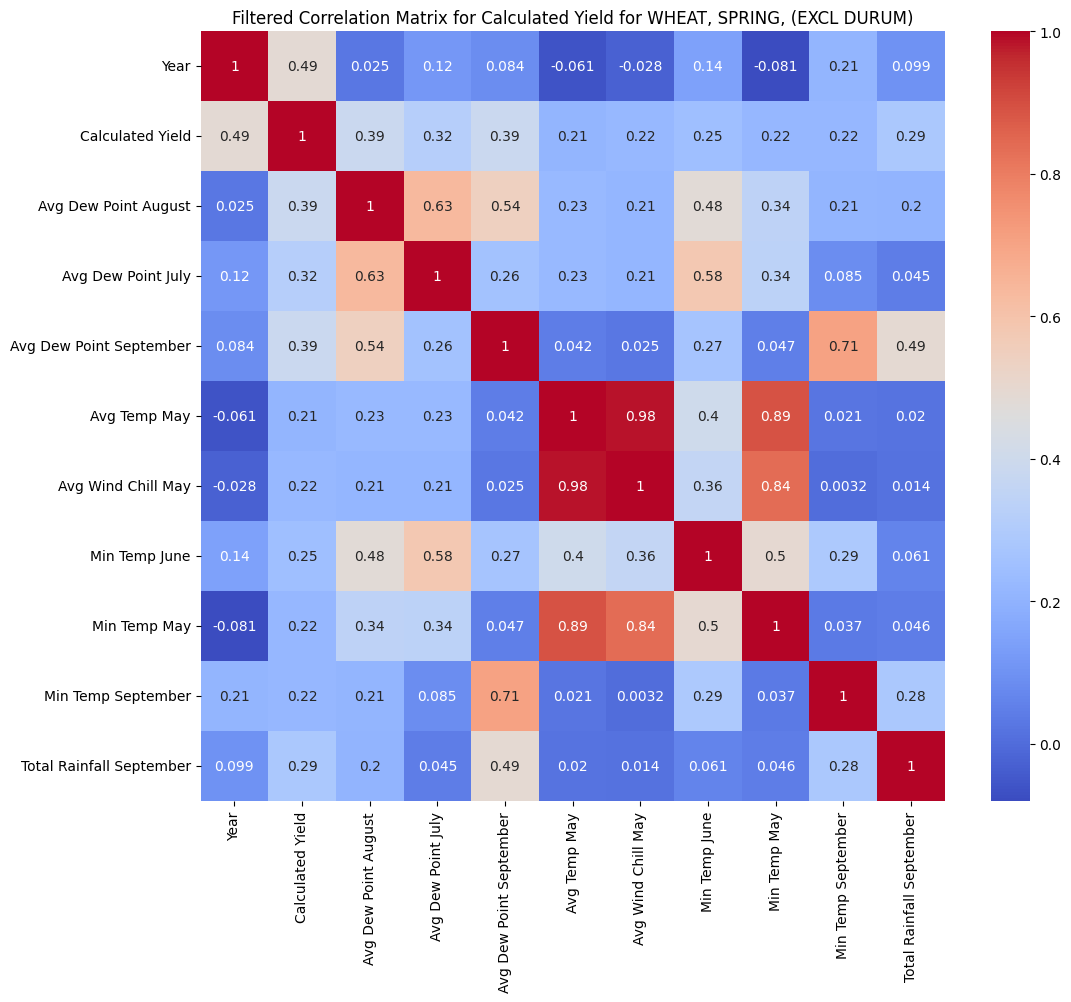

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named corr_matrix which is a correlation matrix

# The column of interest
column_of_interest = 'Calculated Yield'

# Check if the column of interest is in the correlation matrix
if column_of_interest in corr_matrix.index:
    # Find columns with correlation greater than 0.5
    high_corr_columns = corr_matrix[column_of_interest][corr_matrix[column_of_interest] > 0.2].index.tolist()

    # Ensure the column of interest is included in the list
    if column_of_interest not in high_corr_columns:
        high_corr_columns.append(column_of_interest)

    # Print the columns with high correlation
    print("Columns with correlation > 0.2 with 'Calculated Yield':", high_corr_columns)

    # Filtering the correlation matrix to include only the relevant columns
    filtered_corr_matrix = corr_matrix.loc[high_corr_columns, high_corr_columns]

    # Plotting the filtered correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Filtered Correlation Matrix for Calculated Yield for {dict_type[select_type]}")
    plt.show()
else:
    print(f"'{column_of_interest}' is not in the correlation matrix.")


In [70]:
df_model = numeric_df[high_corr_columns]
#df_model.to_csv('data_proc/model1.csv',index=False)

#### Model: Wheat, Spring (excl DURUM)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import skew
from xgboost import XGBRegressor
from math import sqrt

import numpy as np

In [72]:
# Load the dataset
file_path = 'data_proc/model1.csv' # Replace with your file path
data = pd.read_csv(file_path)

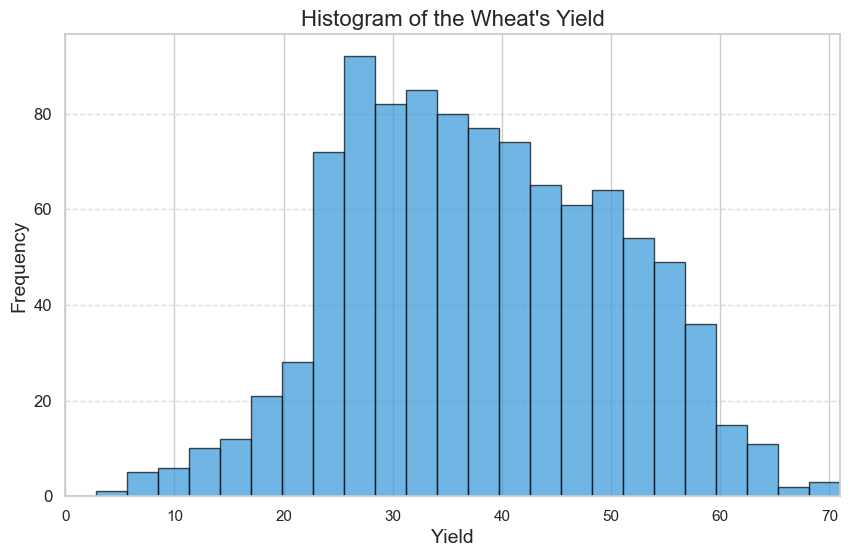

In [73]:
# Adjusting the function to include an argument for deciding whether to create a stacked plot

def plot_hist(data, filter_year=None, stacked=True):
    """
    Plots a histogram of 'Calculated Yield' from a given DataFrame.

    This function can generate either a stacked histogram with 'Calculated Yield'
    data binned by specified year ranges or a normal histogram for the whole dataset
    or a filtered year if `filter_year` is specified.

    Parameters:
    - data (DataFrame): The DataFrame containing 'Calculated Yield' and 'Year' columns.
    - filter_year (int, optional): The year to filter the data on. If None, no year-based filtering is applied.
                                   Defaults to None.
    - stacked (bool, optional): A flag to specify whether to create a stacked histogram or not. If True, the histogram
                                will be stacked by the specified year bins. If False, a normal histogram for the entire
                                dataset or the filtered year is created. Defaults to True.

    Returns:
    - It displays the histogram plot.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    
    if filter_year is None:
        # Define the bins for 'Calculated Yield' based on the entire dataset
        yield_bins = np.linspace(0, data['Calculated Yield'].max(), 26)
        
        if stacked:
            # Define the year bins and labels for the legend
            year_bins = [1990, 1995, 2000, 2005, 2010, 2015, 2023] # Include 2022 in the last bin
            labels = ['1990-1995', '1996-2000', '2001-2005', '2006-2010', '2011-2015', '2016-2022']
            hist_data = []  # List to hold the data for each bin
            
            # Create a list of arrays, each containing the 'Calculated Yield' data for each year bin
            for i in range(len(year_bins)-1):
                bin_data = data[(data['Year'] >= year_bins[i]) & (data['Year'] < year_bins[i+1])]['Calculated Yield']
                hist_data.append(np.histogram(bin_data, bins=yield_bins)[0])
            
            # Convert the list of arrays into a 2D numpy array for stacking
            hist_data = np.array(hist_data)
            
            # Plot a stacked bar plot
            plt.bar(yield_bins[:-1], hist_data[0], width=np.diff(yield_bins), label=labels[0], align='edge')
            for i in range(1, len(hist_data)):
                plt.bar(yield_bins[:-1], hist_data[i], width=np.diff(yield_bins), bottom=hist_data[:i].sum(axis=0), 
                        label=labels[i], align='edge')
            plt.legend()
        else:
            # Plot a normal histogram for the entire dataset
            plt.hist(data['Calculated Yield'], bins=yield_bins, color='#3498db', alpha=0.7, edgecolor='black')
    else:
        # Filter the data by the specified year
        data = data[data['Year'] == filter_year]
        data_yield = data['Calculated Yield']
        print(skew(data_yield))
        bin_edges = np.linspace(0, data_yield.max(), 26)
        plt.hist(data_yield, bins=bin_edges, color='#3498db', alpha=0.7, edgecolor='black')
        plt.xticks(bin_edges, fontsize=12, rotation=45)

    plt.xlabel("Yield", fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title("Histogram of the Wheat's Yield", fontsize=16)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.gca().set_xlim(0, data['Calculated Yield'].max())

    
    # Show the histogram
    plt.show()

# Call the function without filtering by year and set stacked to False to create a normal histogram
plot_hist(data, filter_year=None, stacked=False)


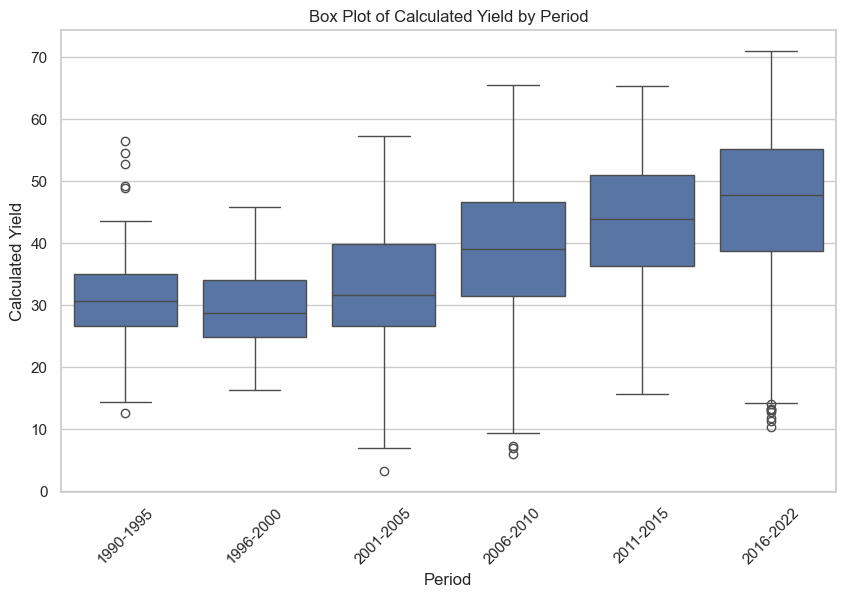

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box(df):
    """
    Plots a box plot of 'Calculated Yield' for different periods.

    Parameters:
    - data (DataFrame): The DataFrame containing 'Calculated Yield' and 'Year' columns.

    Returns:
    - It displays the box plot.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    
    # Define the bins for years and create a new column 'Period' in the DataFrame to categorize each row into a period
    bins = [1990, 1995, 2000, 2005, 2010, 2015, 2022]
    labels = ['1990-1995', '1996-2000', '2001-2005', '2006-2010', '2011-2015', '2016-2022']
    df2 = df.copy()
    df2['Period'] = pd.cut(df2['Year'], bins=bins, labels=labels, include_lowest=True)
    
    # Create the box plot
    sns.boxplot(x='Period', y='Calculated Yield', data=df2)
    
    plt.xlabel('Period')
    plt.ylabel('Calculated Yield')
    plt.title('Box Plot of Calculated Yield by Period')
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

# Assuming 'data' is your DataFrame with 'Calculated Yield' and 'Year' columns
plot_box(data)


In [77]:
NORMALIZE =  True
def model(data, normalize=NORMALIZE,include_lr=True, drop_year=True):
    # Splitting the dataset into features (X) and target variable (y)
    if drop_year:
        X = data.drop(['Calculated Yield', 'Year'], axis=1)
    else:
        X = data.drop(['Calculated Yield'], axis=1)

    y = data['Calculated Yield']

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizing the features
    if normalize:
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Initialize models
    if include_lr:
        linear_model = LinearRegression()
    rf_model = RandomForestRegressor(random_state=42)
    gb_model = GradientBoostingRegressor(random_state=42)
    xgb_model = XGBRegressor(random_state=42)  

    # Train models and make predictions
    if include_lr:
        models = [linear_model, rf_model, gb_model, xgb_model]
        model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']
    else:
        models = [rf_model, gb_model, xgb_model]
        model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost']
        
    predictions = {}
    for model, name in zip(models, model_names):
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)

    # Evaluate models
    results = []
    for name, pred in predictions.items():
        mae = mean_absolute_error(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        rmse = sqrt(mse)  # Calculating RMSE
        r2 = r2_score(y_test, pred)
        results.append([name, mae, mse, rmse, r2])  # Adding RMSE to results

    # Compile results into a DataFrame
    results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R²'])
    return results_df

# Call the function
model(data, normalize=False)

,Model,MAE,MSE,RMSE,R²
0,Linear Regression,8.563203,105.564609,10.274464,0.319568
1,Random Forest,6.442170,67.279429,8.202404,0.566340
2,Gradient Boosting,7.130367,78.569640,8.863952,0.493568
3,XGBoost,6.528897,70.883033,8.419206,0.543113


## ADD new constructed features

In [78]:
df_all.head(1)

,Year,Type,County,Ag District,Ag District Code,Calculated Yield,Avg Bare Soil Temp April,Avg Bare Soil Temp August,Avg Bare Soil Temp December,Avg Bare Soil Temp February,...,Total Solar Rad December,Total Solar Rad February,Total Solar Rad January,Total Solar Rad July,Total Solar Rad June,Total Solar Rad March,Total Solar Rad May,Total Solar Rad November,Total Solar Rad October,Total Solar Rad September
0,2000,"WHEAT, SPRING, (EXCL DURUM)",ADAMS,SOUTHWEST,70,29.456693,46.845,73.752,31.71,27.342,...,131.218,255.18,162.093,587.745,618.084,373.497,543.202,147.631,253.259,418.751


In [79]:
df_new = pd.read_csv('../new_feature_meteo_with_production.csv', delimiter=';')
df_new.head()

,Unnamed: 0,Year,Type,County,Ag District,Ag District Code,"ACRES PLANTED, NET","YIELD, MEASURED IN BU / NET PLANTED ACRE",Calculated Yield,Consecutive Hot Days January,...,Consecutive Wet Days November,Consecutive Hot Days December,Raining Days December,Consecutive Ranning Days December,Drying Days December,Consecutive Drying Days December,Rainfall December,Hot Days December,Wet Days December,Consecutive Wet Days December
0,0,2000,"WHEAT, SPRING, (EXCL DURUM)",ADAMS,SOUTHWEST,70,NaN,NaN,29.456693,0.0,...,26.0,0.0,0.0,0.0,31.0,31.0,0.0,0.0,29.0,16.0
1,1,2000,"WHEAT, SPRING, DURUM",ADAMS,SOUTHWEST,70,NaN,NaN,30.937500,0.0,...,26.0,0.0,0.0,0.0,31.0,31.0,0.0,0.0,29.0,16.0
2,2,2000,"WHEAT, WINTER",ADAMS,SOUTHWEST,70,6600.0,35.6,35.636364,0.0,...,26.0,0.0,0.0,0.0,31.0,31.0,0.0,0.0,29.0,16.0
3,3,2000,"WHEAT, SPRING, (EXCL DURUM)",BARNES,EAST CENTRAL,60,NaN,NaN,39.555556,0.0,...,26.0,0.0,0.0,0.0,31.0,31.0,0.0,0.0,31.0,31.0
4,4,2000,"WHEAT, SPRING, DURUM",BARNES,EAST CENTRAL,60,NaN,NaN,31.538462,0.0,...,26.0,0.0,0.0,0.0,31.0,31.0,0.0,0.0,31.0,31.0


In [80]:
df_new = df_new[df_new['Type']=='WHEAT, SPRING, (EXCL DURUM)'].drop(['Unnamed: 0','Type','Calculated Yield','ACRES PLANTED, NET', 'Ag District Code','Ag District'],axis=1)
df_new.shape

(1059, 111)

In [81]:
df_all = df_all[df_all['Type']=='WHEAT, SPRING, (EXCL DURUM)']
df_all.shape

(1047, 162)

In [82]:
df_final = df_new.merge(df_all, on=['Year','County'], how='inner').drop('YIELD, MEASURED IN BU / NET PLANTED ACRE', axis=1)
df_final.shape

(1010, 270)

In [83]:
df_final.isna().sum()

Year                                 0
County                               0
Consecutive Hot Days January        29
Raining Days January                29
Consecutive Ranning Days January    29
                                    ..
Total Solar Rad March               28
Total Solar Rad May                 28
Total Solar Rad November             1
Total Solar Rad October              4
Total Solar Rad September            7
Length: 270, dtype: int64

In [84]:
### NORMALIZE
numeric_df = df_final.select_dtypes(include='number')

# Check for constant columns
constant_columns = numeric_df.columns[numeric_df.nunique() == 1]
print("Constant columns:", constant_columns)

# Remove constant columns
numeric_df = numeric_df.drop(columns=constant_columns)

# Check for missing values
missing_values = numeric_df.isnull().sum()
print("Columns with missing values:", missing_values[missing_values > 0])

# Drop rows with missing values (or handle missing values appropriately)
numeric_df = numeric_df.dropna()

# Apply z-score normalization using sklearn's StandardScaler
scaler = StandardScaler()
numeric_df_normalized = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)


df_model = numeric_df[high_corr_columns]


Constant columns: Index(['Consecutive Hot Days January', 'Raining Days January',
       'Consecutive Ranning Days January', 'Hot Days January',
       'Consecutive Hot Days February', 'Hot Days February',
       'Consecutive Hot Days March', 'Hot Days March',
       'Consecutive Hot Days November', 'Hot Days November',
       'Consecutive Hot Days December', 'Raining Days December',
       'Consecutive Ranning Days December', 'Hot Days December'],
      dtype='object')
Columns with missing values: Drying Days January                29
Consecutive Drying Days January    29
Rainfall January                   29
Wet Days January                   29
Consecutive Wet Days January       29
                                   ..
Total Solar Rad March              28
Total Solar Rad May                28
Total Solar Rad November            1
Total Solar Rad October             4
Total Solar Rad September           7
Length: 250, dtype: int64


Columns with correlation > 0.2 with 'Calculated Yield': ['Year', 'Wet Days March', 'Consecutive Hot Days May', 'Hot Days May', 'Wet Days July', 'Consecutive Wet Days July', 'Wet Days August', 'Consecutive Wet Days August', 'Raining Days September', 'Rainfall September', 'Wet Days September', 'Consecutive Wet Days September', 'Wet Days November', 'Consecutive Wet Days November', 'Wet Days December', 'Consecutive Wet Days December', 'Calculated Yield', 'Avg Dew Point August', 'Avg Dew Point July', 'Avg Dew Point September', 'Avg Temp May', 'Avg Wind Chill May', 'Min Temp June', 'Min Temp May', 'Min Temp September', 'Total Rainfall September']


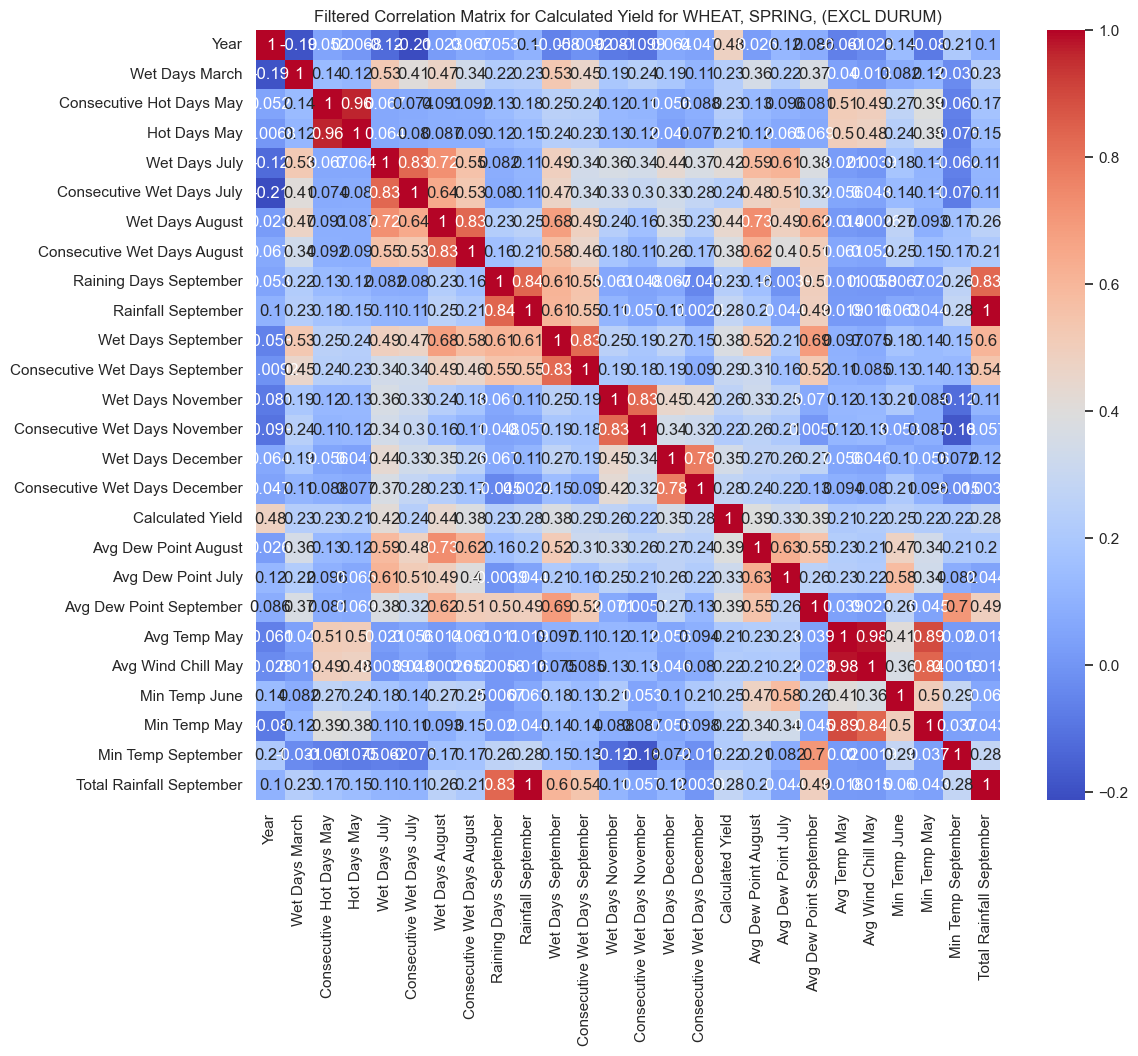

In [85]:
corr_matrix = numeric_df_normalized.corr()

column_of_interest = 'Calculated Yield'

# Check if the column of interest is in the correlation matrix
if column_of_interest in corr_matrix.index:
    # Find columns with correlation greater than 0.5
    high_corr_columns = corr_matrix[column_of_interest][corr_matrix[column_of_interest] > 0.2].index.tolist()

    # Ensure the column of interest is included in the list
    if column_of_interest not in high_corr_columns:
        high_corr_columns.append(column_of_interest)

    # Print the columns with high correlation
    print("Columns with correlation > 0.2 with 'Calculated Yield':", high_corr_columns)

    # Filtering the correlation matrix to include only the relevant columns
    filtered_corr_matrix = corr_matrix.loc[high_corr_columns, high_corr_columns]

    # Plotting the filtered correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Filtered Correlation Matrix for Calculated Yield for {dict_type[select_type]}")
    plt.show()
else:
    print(f"'{column_of_interest}' is not in the correlation matrix.")


In [86]:
model(df_model,normalize = False)

,Model,MAE,MSE,RMSE,R²
0,Linear Regression,9.846168,138.801142,11.781390,0.248352
1,Random Forest,6.623851,71.399464,8.449820,0.613352
2,Gradient Boosting,7.230290,82.409487,9.077967,0.553729
3,XGBoost,6.561378,72.794586,8.531974,0.605797


In [87]:
model(df_model,normalize = True)

,Model,MAE,MSE,RMSE,R²
0,Linear Regression,9.846168,138.801142,11.781390,0.248352
1,Random Forest,6.624042,71.344920,8.446592,0.613647
2,Gradient Boosting,7.230290,82.409487,9.077967,0.553729
3,XGBoost,6.561378,72.794586,8.531974,0.605797


In [88]:
####### trying with all the columns

In [89]:
ALL = df_final.select_dtypes(include='number')

In [90]:
model(ALL.dropna(), False, include_lr=False)

KeyboardInterrupt: 

In [192]:
model(ALL.dropna(), normalize=True, include_lr=False)

KeyboardInterrupt: 

#### Grid Search on Gradient Boosting algorithm

In [91]:
from sklearn.model_selection import GridSearchCV

df = ALL.dropna()
drop_year = True
# Fit the grid search to the data
if drop_year:
    X = df.drop(['Calculated Yield', 'Year'], axis=1)
else:
    X = df.drop(['Calculated Yield'], axis=1)

y = df['Calculated Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
# gb_model = GradientBoostingRegressor(random_state=42)

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 3, 4],
#     'min_samples_leaf': [1, 2, 3]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)


# grid_search.fit(X_train, y_train)  # Replace X and y with your data

# # After fitting, you can get the best parameters and best model like this:
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


best_params, best_model
({'max_depth': 4,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 200},
 GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, n_estimators=200,
                           random_state=42))


In [93]:
gb = GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, n_estimators=200,
                           random_state=42)
gb.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, n_estimators=200,
                          random_state=42)

In [96]:
pred = gb.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print('mae: ', mae)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)
print('rmse: ', rmse)
r2 = r2_score(y_test, pred)
print('r2: ', r2)

mae:  5.276977266681267
rmse:  6.798553018870759
r2:  0.7497037889176665


In [97]:
dataa = {
    'Model': ['Improved Gradient Boost'],
    'MAE': [mae],
    'RMSE': [rmse],
    'R2': [r2]
}

dff = pd.DataFrame(dataa)
dff

,Model,MAE,RMSE,R2
0,Improved Gradient Boost,5.276977,6.798553,0.749704


#### Projection 15%

MEAN:  49.23391546476763
STD:  7.590364997286881


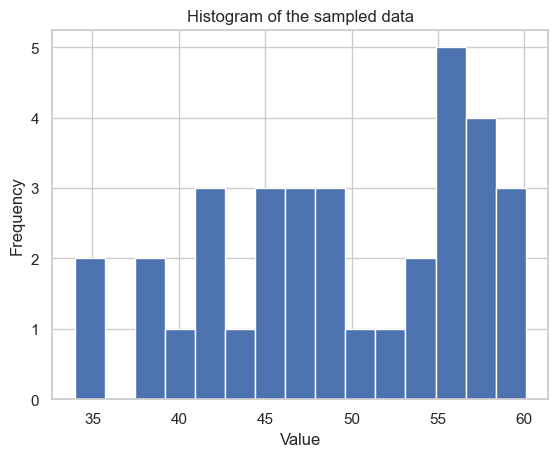

In [254]:
proj = df[df['Year']==2018].reset_index(drop=True)

print("MEAN: ",proj['Calculated Yield'].mean())
print("STD: ",proj['Calculated Yield'].std())

# Plotting the histogram
plt.hist(proj['Calculated Yield'], bins=15)  # 'bins' defines the number of intervals or bars in the histogram
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the sampled data')
plt.show()


In [248]:
x_current = proj.drop(['Calculated Yield', 'Year'], axis=1)
pred = gb.predict(x_current)
print('the predicted mean is: ',pred.mean())
print('the predicted std is: ',pred.std())

mae = mean_absolute_error(proj['Calculated Yield'], pred)
print('mae: ', mae)

the predicted mean is:  48.62708703310251
the predicted std is:  6.383244016354023
mae:  1.6256789852682108


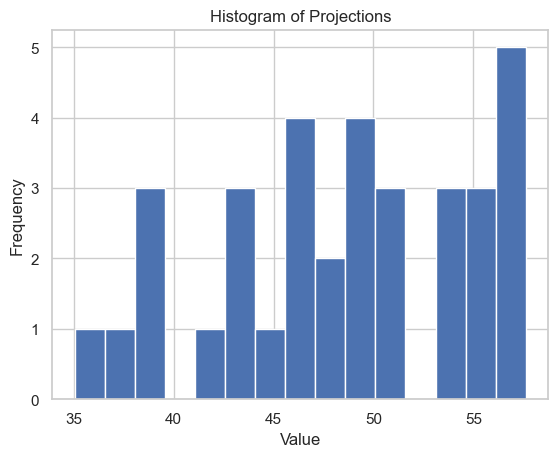

In [249]:
plt.hist(pred, bins=15)  
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Projections')
plt.show()

mean of the projections :  42.407743448577506
STD of the projections :  4.96432679548002


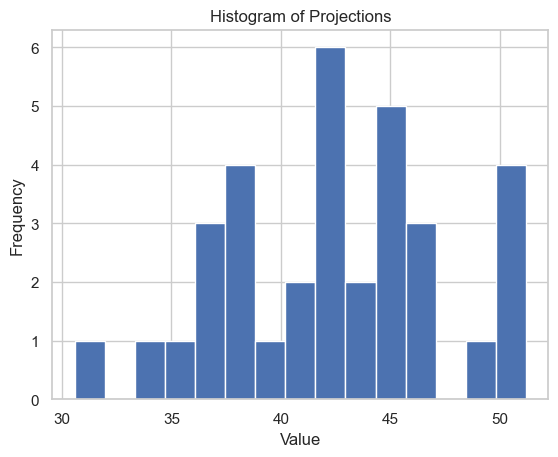

In [255]:
x_proj = x_current * 1.15
pred_proj = gb.predict(x_proj)
print('mean of the projections : ', pred_proj.mean())
print('STD of the projections : ', pred_proj.std())

plt.hist(pred_proj, bins=15) 
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Projections')
plt.show()

#### Projection en utilisant l'interpolation

In [98]:
gb

GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, n_estimators=200,
                          random_state=42)

In [152]:
df_interpolation.head(2)

,Year,Type,County,Ag District,Ag District Code,Calculated Yield,Avg Bare Soil Temp April,Avg Bare Soil Temp August,Avg Bare Soil Temp December,Avg Bare Soil Temp February,...,Total Solar Rad December,Total Solar Rad February,Total Solar Rad January,Total Solar Rad July,Total Solar Rad June,Total Solar Rad March,Total Solar Rad May,Total Solar Rad November,Total Solar Rad October,Total Solar Rad September
0,2000,"WHEAT, SPRING, (EXCL DURUM)",ADAMS,SOUTHWEST,70,29.456693,46.845,73.752,31.710,27.342,...,131.218,255.180,162.093,587.745,618.084,373.497,543.202,147.631,253.259,418.751
82,2001,"WHEAT, SPRING, (EXCL DURUM)",ADAMS,SOUTHWEST,70,29.531250,44.592,76.638,25.798,30.387,...,148.363,272.425,175.029,582.944,562.350,347.712,572.535,190.305,271.243,372.330


In [153]:
df_interpolation_all = df_new.merge(df_interpolation, on=['Year','County'], how='inner').drop('YIELD, MEASURED IN BU / NET PLANTED ACRE', axis=1)
df_interpolation_all = df_interpolation_all.select_dtypes(include='number')
print('Mean of the real ', df_interpolation_all['Calculated Yield'].mean())
print('STD of the real ',df_interpolation_all['Calculated Yield'].std())

Mean of the real  24.930502657524514
STD of the real  8.815365250667934


In [154]:
drop_year = True
# Fit the grid search to the data
if drop_year:
    X_interpolation = df_interpolation_all.drop(['Calculated Yield', 'Year'], axis=1)


y_interpolation = df_interpolation_all['Calculated Yield']


In [155]:
pred = gb.predict(X_interpolation)
print('the predicted mean is: ',pred.mean())
print('the predicted std is: ',pred.std())

mae = mean_absolute_error(y_interpolation, pred)
print('mae: ', mae)

the predicted mean is:  26.296487210770994
the predicted std is:  9.154928649335544
mae:  1.7448262702703263


In [156]:
df_interpolation_all = df_interpolation_all.sort_values(by=['Year'])

In [159]:
from scipy.interpolate import interp1d

df_tmp = df_interpolation_all.set_index('Year')

# Create a new DataFrame with years from 1991 to 2050
projection_years = pd.DataFrame(index=range(start_year, end_year + 1))

# Interpolate values from 1991 to 2050
start_year = 1991
end_year = 2050
years_series = pd.Series(range(start_year, end_year + 1), name='Year')

interpolated_columns = [years_series]


# Interpolate each column using SciPy's interp1d
for column in df_tmp.columns:
    # Drop NaN values for interpolation
    df_column = df_tmp[column].dropna()
    
    # Create an interpolation function
    interp_func = interp1d(df_column.index, df_column.values, kind='linear', fill_value='extrapolate')
    
    # Interpolate values and store in the list
    interpolated_column = pd.Series(interp_func(projection_years.index), name=column)
    interpolated_columns.append(interpolated_column)

# Concatenate the interpolated columns to create the final DataFrame
projection_years = pd.concat(interpolated_columns, axis=1)

In [160]:
projection_years

,Year,Consecutive Hot Days January,Raining Days January,Consecutive Ranning Days January,Drying Days January,Consecutive Drying Days January,Rainfall January,Hot Days January,Wet Days January,Consecutive Wet Days January,...,Total Solar Rad December,Total Solar Rad February,Total Solar Rad January,Total Solar Rad July,Total Solar Rad June,Total Solar Rad March,Total Solar Rad May,Total Solar Rad November,Total Solar Rad October,Total Solar Rad September
0,1991,0.0,0.0,0.0,31.0,31.0,0.0,0.0,28.000000,26.000000,...,127.197000,229.773000,165.146000,636.132000,553.302000,331.091000,479.848000,144.623000,265.301000,382.776000
1,1992,0.0,0.0,0.0,31.0,31.0,0.0,0.0,16.000000,7.000000,...,118.365000,214.860000,147.381000,495.407000,540.343000,328.793000,568.081000,123.099000,257.541000,389.102000
2,1993,0.0,0.0,0.0,31.0,31.0,0.0,0.0,31.000000,31.000000,...,113.198000,249.305000,162.614000,452.777000,513.840000,324.847000,517.645000,146.767000,262.910000,361.840000
3,1994,0.0,0.0,0.0,31.0,31.0,0.0,0.0,30.000000,16.000000,...,123.906000,255.872000,145.457000,591.960000,532.840000,390.720000,573.666000,153.912000,209.883000,364.584000
4,1995,0.0,0.0,0.0,31.0,31.0,0.0,0.0,29.000000,21.000000,...,100.474000,248.515000,141.640000,619.714000,568.083000,322.601000,455.033000,134.766000,209.184000,394.235000
5,1996,0.0,0.0,0.0,31.0,31.0,0.0,0.0,24.000000,11.000000,...,107.042000,214.383000,135.080000,581.268000,592.553000,341.215000,341.232000,128.870000,233.597000,323.269000
6,1997,0.0,0.0,0.0,31.0,31.0,0.0,0.0,27.000000,14.000000,...,121.523000,204.382000,143.988000,544.202000,607.687000,344.220000,477.135000,165.585000,285.344000,394.937000
7,1998,0.0,0.0,0.0,31.0,31.0,0.0,0.0,23.000000,19.000000,...,138.471000,152.854000,140.846000,604.626000,475.160000,328.970000,541.848000,135.206000,212.443000,428.707000
8,1999,0.0,0.0,0.0,31.0,31.0,0.0,0.0,28.000000,22.000000,...,151.731000,209.020000,145.976000,601.294000,576.352000,341.538000,507.385000,188.161000,287.227000,363.120000
9,2000,0.0,0.0,0.0,31.0,31.0,0.0,0.0,25.000000,8.000000,...,131.218000,255.180000,162.093000,587.745000,618.084000,373.497000,543.202000,147.631000,253.259000,418.751000


In [167]:
X_test_interp = projection_years[projection_years['Year']==2030].drop(['Calculated Yield','Year'],axis=1)
y_test_interp = gb.predict(X_test_interp)
print(f"in 2022: {projection_years[projection_years['Year']==2022]['Calculated Yield']} however in 2030: {y_test_interp}")

in 2022: 31    43.625
Name: Calculated Yield, dtype: float64 however in 2030: [45.93185826]


## Trying with classification

In [82]:
df_model.isna().sum().sum()

0

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

def model_classification(data, n_bins=3, normalize=True, include_lr=False):
    # Determine the unique integer labels for the bins
    unique_labels = range(n_bins)

    # Discretize the target variable
    data['Binned Yield'] = pd.cut(data['Calculated Yield'], bins=n_bins, labels=unique_labels, duplicates='drop')

    # Splitting the dataset into features (X) and target variable (y)
    X = data.drop(['Calculated Yield', 'Year', 'Binned Yield'], axis=1)
    y = data['Binned Yield']

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizing the features
    if normalize:
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Initialize models
    if include_lr:
        log_model = LogisticRegression(random_state=42)
    rf_classifier = RandomForestClassifier(random_state=42)
    gb_classifier = GradientBoostingClassifier(random_state=42)
    xgb_classifier = XGBClassifier(random_state=42)

    # Train models and make predictions
    if include_lr:
        models = [log_model, rf_classifier, gb_classifier]
        model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
    else:
        models = [rf_classifier, gb_classifier]
        model_names = ['Random Forest', 'Gradient Boosting']
    
    predictions = {}
    for model, name in zip(models, model_names):
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)

    # Evaluate models
    results = []
    for name, pred in predictions.items():
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='macro')
        recall = recall_score(y_test, pred, average='macro')
        f1 = f1_score(y_test, pred, average='macro')
        mae = mean_absolute_error(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        
        results.append([name, accuracy, precision, recall, f1,mae,mse])

    # Compile results into a DataFrame
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','mae','mse'])
    return results_df

# Call the function with your data
model_classification(df_model, n_bins=10, normalize=True,include_lr=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_15800\3996518703.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Binned Yield'] = pd.cut(data['Calculated Yield'], bins=n_bins, labels=unique_labels, duplicates='drop')
C:\Users\Asus\anaconda3\envs\wheat\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\

,Model,Accuracy,Precision,Recall,F1 Score,mae,mse
0,Logistic Regression,0.244898,0.129059,0.149792,0.129780,1.454082,3.505102
1,Random Forest,0.408163,0.308225,0.281352,0.271092,0.933673,1.892857
2,Gradient Boosting,0.341837,0.229445,0.225664,0.220697,1.086735,2.382653


In [187]:
model_classification(ALL.dropna(), n_bins=10, normalize=True, include_lr=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15800\3996518703.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Binned Yield'] = pd.cut(data['Calculated Yield'], bins=n_bins, labels=unique_labels, duplicates='drop')
C:\Users\Asus\anaconda3\envs\wheat\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\

,Model,Accuracy,Precision,Recall,F1 Score,mae,mse
0,Logistic Regression,0.352041,0.275764,0.252939,0.250095,0.887755,1.530612
1,Random Forest,0.428571,0.369706,0.302538,0.301319,0.821429,1.515306
2,Gradient Boosting,0.423469,0.411802,0.296867,0.297405,0.877551,1.734694


C:\Users\Asus\AppData\Local\Temp\ipykernel_15800\3837326063.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Binned Yield'] = pd.cut(data['Calculated Yield'], bins=n_bins, labels=unique_labels, duplicates='drop')


<Figure size 800x600 with 0 Axes>

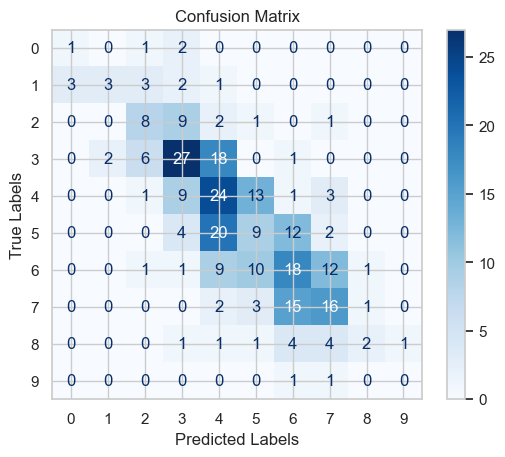

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(data,n_bins=10):
    unique_labels = range(n_bins)
    
    # Discretize the target variable
    data['Binned Yield'] = pd.cut(data['Calculated Yield'], bins=n_bins, labels=unique_labels, duplicates='drop')
    
    # Splitting the dataset into features (X) and target variable (y)
    X = data.drop(['Calculated Yield', 'Year', 'Binned Yield'], axis=1)
    y = data['Binned Yield']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    gb_classifier = GradientBoostingClassifier(random_state=42)
    
    # Train the Random Forest model (you may have already trained it in your function)
    gb_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = gb_classifier.predict(X_test)
    
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Create a figure for the confusion matrix
    plt.figure(figsize=(8, 6))
    
    # Plot the confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels).plot(cmap='Blues', values_format='d')
    
    # Add labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    
    # Show the plot
    plt.show()


plot_confusion_matrix(ALL.dropna(),n_bins=10)

In [181]:
aa = ALL.dropna()
aa['Binned Yield'] = pd.cut(aa['Calculated Yield'], bins=n_bins, labels=unique_labels, duplicates='drop')

C:\Users\Asus\AppData\Local\Temp\ipykernel_15800\2623485031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa['Binned Yield'] = pd.cut(aa['Calculated Yield'], bins=n_bins, labels=unique_labels, duplicates='drop')


Binned Yield
4    199
3    193
5    167
6    148
7    123
2     66
8     41
1     25
0      9
9      9
Name: count, dtype: int64

In [184]:
aa.groupby(['Binned Yield'])['Calculated Yield'].aggregate([max, min])


C:\Users\Asus\AppData\Local\Temp\ipykernel_15800\1880852955.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aa.groupby(['Binned Yield'])['Calculated Yield'].aggregate([max, min])
C:\Users\Asus\AppData\Local\Temp\ipykernel_15800\1880852955.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  aa.groupby(['Binned Yield'])['Calculated Yield'].aggregate([max, min])
C:\Users\Asus\AppData\Local\Temp\ipykernel_15800\1880852955.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep curren

,max,min
Binned Yield,,
0,9.905660,3.264000
1,16.736842,10.298137
2,23.520000,17.187500
3,30.326531,23.608696
4,37.113861,30.375000
5,43.835616,37.142857
6,50.631579,43.937677
7,57.311828,50.751708
8,63.944444,57.530488
